# Q1. Is it true that the home team is more likely to win?

We begin by initializing the CSV file. It is necessary to check its content and adapt it to our needs.

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

df = pd.read_csv('../laliga.csv')
df

,season,division,matchday,date,time,home_team,away_team,score
0,1928-1929,1,1,2/10/29,NaN,Arenas Club,Athletic Madrid,2:3
1,1928-1929,1,1,2/10/29,NaN,Espanyol,Real Unión,3:2
2,1928-1929,1,1,2/10/29,NaN,Real Madrid,Catalunya,5:0
3,1928-1929,1,1,2/10/29,NaN,Donostia,Athletic,1:1
4,1928-1929,1,1,2/12/29,NaN,Racing,Barcelona,0:2
...,...,...,...,...,...,...,...,...
48775,2021-2022,2,42,5/29/22,NaN,Real Oviedo,UD Ibiza,NaN
48776,2021-2022,2,42,5/29/22,NaN,Real Sociedad B,Real Zaragoza,NaN
48777,2021-2022,2,42,5/29/22,NaN,Sporting Gijón,UD Las Palmas,NaN
48778,2021-2022,2,42,5/29/22,NaN,CD Tenerife,FC Cartagena,NaN


The necessary information is contained within the score column. Its information can be broken into two new columns, home goals and away goals, for better handling. And additional result column that uses the 1, 2 or X format can also be added.

In [3]:
df["local_score"] = df["score"].str.split(":").str[0]
df["away_score"] = df["score"].str.split(":").str[1]
df['results'] = df.apply(lambda row: 1 if row['local_score'] > row['away_score'] else (2 if row['away_score'] > row['local_score'] else ('X' if row['local_score'] == row['away_score'] else None)), axis=1)
df

,season,division,matchday,date,time,home_team,away_team,score,local_score,away_score,results
0,1928-1929,1,1,2/10/29,NaN,Arenas Club,Athletic Madrid,2:3,2,3,2
1,1928-1929,1,1,2/10/29,NaN,Espanyol,Real Unión,3:2,3,2,1
2,1928-1929,1,1,2/10/29,NaN,Real Madrid,Catalunya,5:0,5,0,1
3,1928-1929,1,1,2/10/29,NaN,Donostia,Athletic,1:1,1,1,X
4,1928-1929,1,1,2/12/29,NaN,Racing,Barcelona,0:2,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...
48775,2021-2022,2,42,5/29/22,NaN,Real Oviedo,UD Ibiza,NaN,NaN,NaN,None
48776,2021-2022,2,42,5/29/22,NaN,Real Sociedad B,Real Zaragoza,NaN,NaN,NaN,None
48777,2021-2022,2,42,5/29/22,NaN,Sporting Gijón,UD Las Palmas,NaN,NaN,NaN,None
48778,2021-2022,2,42,5/29/22,NaN,CD Tenerife,FC Cartagena,NaN,NaN,NaN,None


In [215]:
result_counts = df['results'].value_counts()
result_counts

results
1    25317
X    12280
2    10403
Name: count, dtype: int64

We can see that the amount of times the local team wins is way higher than the ties or defeats. So we can cocnlude that it is true that the local team is more likely to win. Now we can plot the corresponding data.

<Axes: ylabel='Match results'>

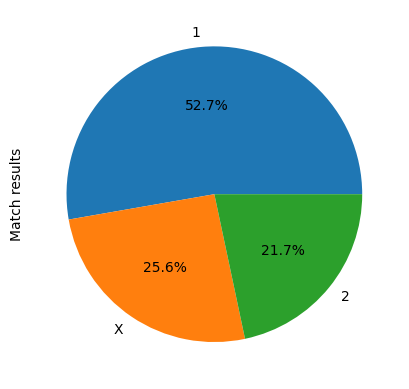

In [5]:
result_counts.plot(kind='pie', label ='Match results', autopct = '%1.1f%%')

As the results indicate, the local team wins more than half of the matches. Also, it is slightly more likely for the result to be a tie rather than a defeat of the local team.

# Q2. What are the top ten scoring teams of all time? What are the ten teams that concede the most? What have been the biggest wins?

We can use the columns created in the previous exercise for this one too. First, we will sum all the scored goals as a local for each team. We will do the same for away goals and sum them up.

Text(0.5, 1.0, 'Top 10 goal scorers')

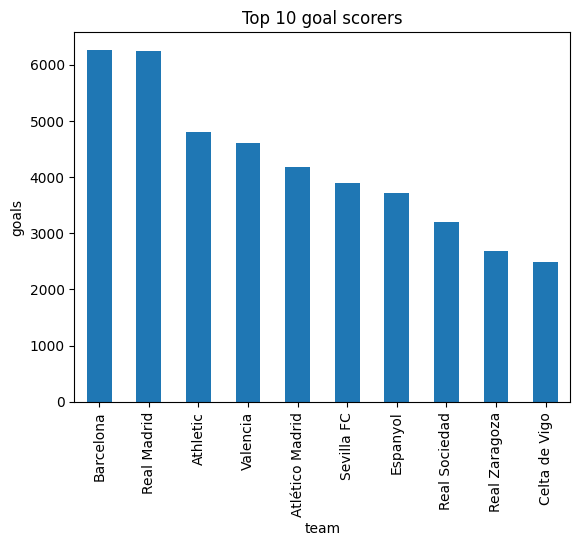

In [10]:

df = df.dropna(subset=['local_score'])
df = df.dropna(subset=['away_score'])
df['local_score'] = df['local_score'].astype(int)
df['away_score'] = df['away_score'].astype(int)
q2 = df
q2 = q2[q2['division'] == 1]
total_goals = q2.groupby('home_team')['local_score'].sum().reset_index()
total_goals = total_goals.rename(columns={'home_team':'team', 'local_score':'goals'})
away_goals = q2.groupby('away_team')['away_score'].sum().reset_index()
total_goals['goals'] += away_goals['away_score']
top10goals = total_goals.sort_values(by='goals', ascending=False).reset_index(drop=True).head(10)
top10goals.plot(x='team', y='goals', kind='bar', legend=False)
plt.xlabel('team')
plt.ylabel('goals')
plt.title('Top 10 goal scorers')

As expected, Barcelona and Real Madrid are the teams that have scored the most goals. Followed by Athletic which has never descended into second division. Now we repeat the process for the conceaded goals.

Text(0.5, 1.0, 'Top 10 goal conceders')

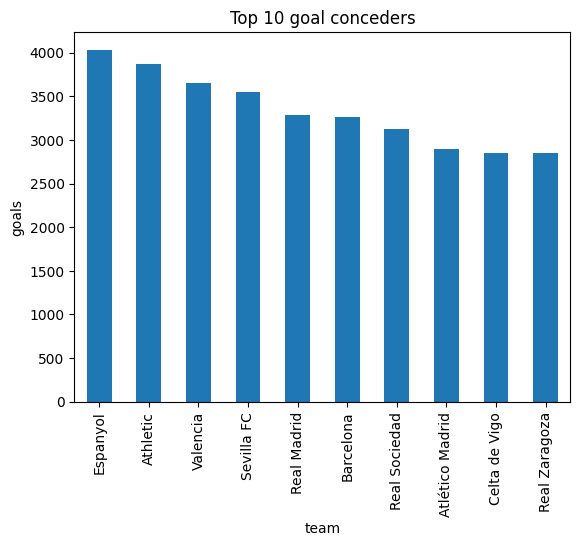

In [7]:
total_conceded = q2.groupby('home_team')['away_score'].sum().reset_index()
total_conceded = total_conceded.rename(columns={'home_team':'team', 'away_score':'conceded goals'})
away_conceded = q2.groupby('away_team')['local_score'].sum().reset_index()
total_conceded['conceded goals'] += away_conceded['local_score']
top10conceded = total_conceded.sort_values(by='conceded goals', ascending=False).reset_index(drop=True).head(10)
top10conceded.plot(x='team', y='conceded goals', kind='bar', legend=False)
plt.xlabel('team')
plt.ylabel('goals')
plt.title('Top 10 goal conceders')

The team that has conceded the most goals is Espanyol, this makes sense because it is a team that has spent many seasons in first division but is not one of the stronger teams.

In order to find out the biggest win, we will create another column called goal difference, which will be the difference between the local team goals and the away team goals. Another column with the absolute value is also necessary because the value would be negative if the match is a victory for the away team.

In [11]:
df['goal_diff'] = df['local_score'] - df['away_score']
df['abs_goal_diff'] = np.abs(df['goal_diff'])
df.sort_values(by = 'abs_goal_diff', ascending=False).reset_index(drop=True).head(10)

,season,division,matchday,date,time,home_team,away_team,score,local_score,away_score,results,goal_diff,abs_goal_diff
0,1940-1941,2,15,1/8/41,NaN,Real Sociedad,Real Valladolid,14:2,14,2,2,12,12
1,1956-1957,2,18,1/13/57,NaN,Real Gijón,Lérida,11:0,11,0,1,11,11
2,1930-1931,1,10,2/8/31,NaN,Athletic,Barcelona,12:1,12,1,1,11,11
3,1941-1942,1,1,9/28/41,NaN,Sevilla FC,Real Oviedo,10:0,10,0,1,10,10
4,1950-1951,1,11,11/19/50,NaN,Athletic,Lérida,10:0,10,0,1,10,10
5,1940-1941,1,1,9/29/40,NaN,Sevilla FC,Barcelona,11:1,11,1,1,10,10
6,1962-1963,2,9,11/11/62,NaN,Real Sociedad,CE Sabadell,11:1,11,1,1,10,10
7,1949-1950,2,1,9/4/49,NaN,CE Sabadell,SD Erandio Club,11:1,11,1,1,10,10
8,1941-1942,1,15,1/11/42,NaN,Athletic,Celta de Vigo,10:0,10,0,1,10,10
9,1957-1958,2,32,5/18/58,NaN,Tarrasa,La Felguera,10:1,10,1,1,9,9


These are the 10 biggest victories in the history of the first division of LaLiga.

# Q3. How have LaLiga's television rights changed game schedules in the last years?

To answer this, first we will create a new set that only contains the games that have a valid value for the time. Then, the data will be divided into two subsests for the 2000-2001 season and the 2020-2021 season.

C:\Users\raulh\AppData\Local\Temp\ipykernel_24368\4162231926.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  q3_2000['date'] = pd.to_datetime(q3_2000['date'])
C:\Users\raulh\AppData\Local\Temp\ipykernel_24368\4162231926.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q3_2000['date'] = pd.to_datetime(q3_2000['date'])
C:\Users\raulh\AppData\Local\Temp\ipykernel_24368\4162231926.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

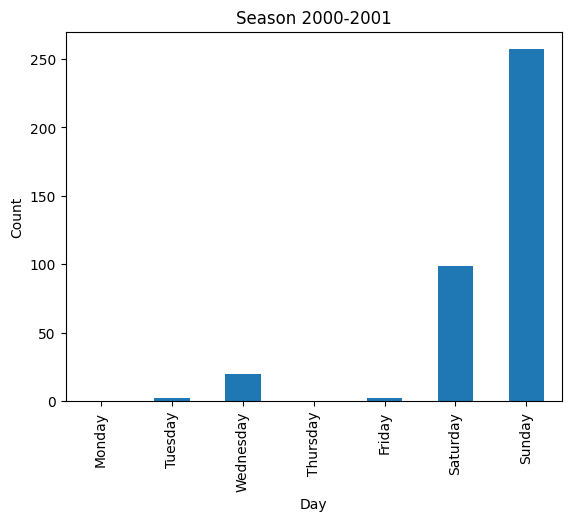

C:\Users\raulh\AppData\Local\Temp\ipykernel_24368\4162231926.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  q3_2020['date'] = pd.to_datetime(q3_2020['date'])
C:\Users\raulh\AppData\Local\Temp\ipykernel_24368\4162231926.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q3_2020['date'] = pd.to_datetime(q3_2020['date'])
C:\Users\raulh\AppData\Local\Temp\ipykernel_24368\4162231926.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

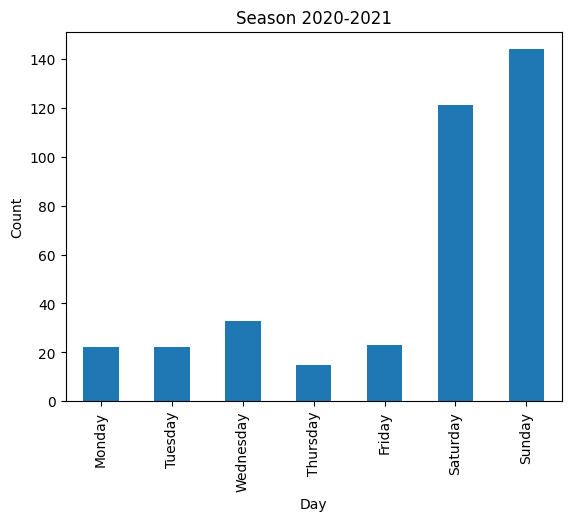

In [43]:
q3 = df
q3 = q3.dropna(subset=['time'])
q3 = q3[q3['division'] == 1]
q3_2000 = q3[q3['season'] == '2000-2001']
q3_2000['date'] = pd.to_datetime(q3_2000['date'])
q3_2000['day_of_week'] = q3_2000['date'].dt.day_name()
day_of_week_2000 = q3_2000['day_of_week'].value_counts()
days_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_2000 = day_of_week_2000.reindex(days_of_week_order, fill_value=0)
day_of_week_2000.plot(kind='bar', legend=False)
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Season 2000-2001')
plt.show()
q3_2020 = q3[q3['season'] == '2020-2021']
q3_2020['date'] = pd.to_datetime(q3_2020['date'])
q3_2020['day_of_week'] = q3_2020['date'].dt.day_name()
day_of_week_2020 = q3_2020['day_of_week'].value_counts()
day_of_week_2020 = day_of_week_2020.reindex(days_of_week_order, fill_value=0)
day_of_week_2020.plot(kind='bar', legend=False)
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Season 2020-2021')
plt.show()

We can observe that games used to only be played on the weekends. There used to be no games played from Monday to Friday. However, nowadays the games are still mostly played on the weekends but is possible to see more games played on other days of the week. Now we will repeat the same but with matchtime.

C:\Users\raulh\AppData\Local\Temp\ipykernel_24368\3893681851.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  q3_2000['time'] = pd.to_datetime(q3_2000['time']).dt.strftime('%H:%M')
C:\Users\raulh\AppData\Local\Temp\ipykernel_24368\3893681851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q3_2000['time'] = pd.to_datetime(q3_2000['time']).dt.strftime('%H:%M')


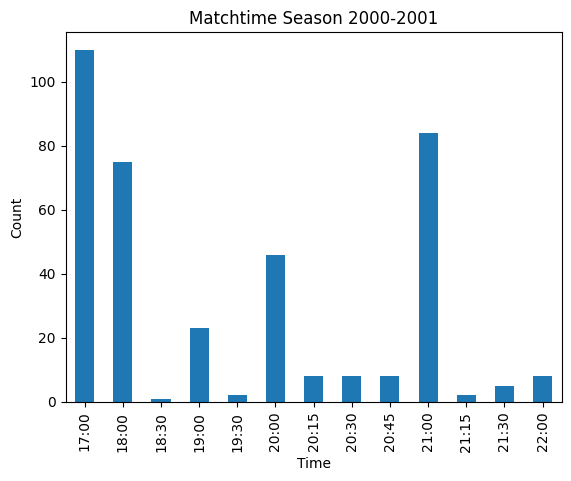

C:\Users\raulh\AppData\Local\Temp\ipykernel_24368\3893681851.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  q3_2020['time'] = pd.to_datetime(q3_2020['time']).dt.strftime('%H:%M')
C:\Users\raulh\AppData\Local\Temp\ipykernel_24368\3893681851.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q3_2020['time'] = pd.to_datetime(q3_2020['time']).dt.strftime('%H:%M')


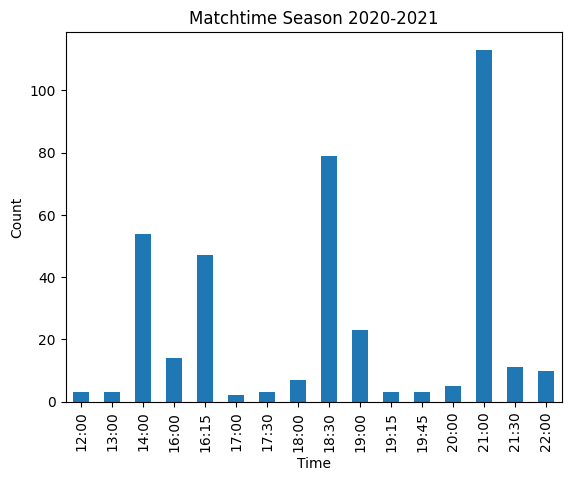

In [44]:
q3_2000['time'] = pd.to_datetime(q3_2000['time']).dt.strftime('%H:%M')
matchtime_2000 = q3_2000['time'].value_counts()
matchtime_2000.sort_index(inplace=True)
matchtime_2000.plot(kind='bar', legend=False)
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Matchtime Season 2000-2001')
plt.show()
q3_2020['time'] = pd.to_datetime(q3_2020['time']).dt.strftime('%H:%M')
matchtime_2020 = q3_2020['time'].value_counts()
matchtime_2020.sort_index(inplace=True)
matchtime_2020.plot(kind='bar', legend=False)
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Matchtime Season 2020-2021')
plt.show()

The main matchtime used to be 17:00, nowadays there is barely any game at that time. In the 2020-2021 season,there have been games played in more different hours than in the 2000-2001 season. Also, now there are more games played earlier and later than the most common time in the year 2000-2001.

# Q4. Cross results table by season and  division 

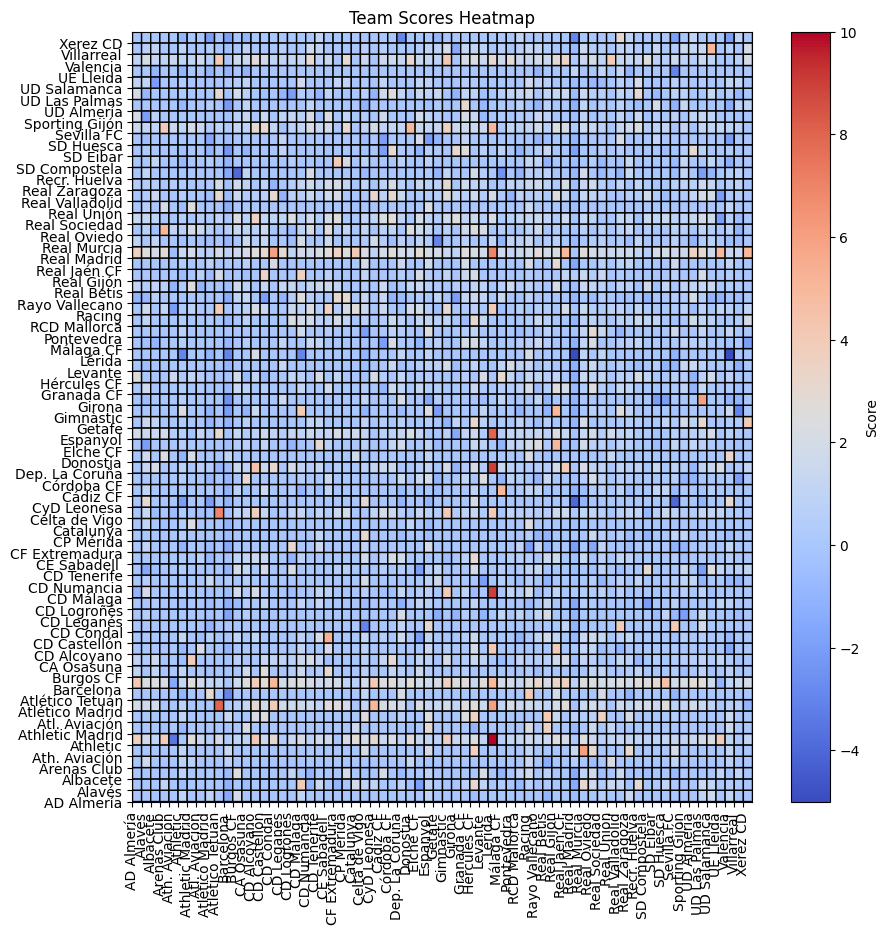

In [257]:
df = df.dropna(subset=['home_team', 'away_team', 'score','goal_diff'])
q4 = df[['home_team', 'away_team', 'score', 'goal_diff']]

# Create a pivot table using 'home_team' and 'away_team' as index and columns
pivot_table = pd.pivot_table(q4, values='goal_diff', index='home_team', columns='away_team', fill_value=0)

# Create the heatmap

plt.figure(figsize=(10, 10))
plt.pcolor(pivot_table, cmap='coolwarm', edgecolors='k', linewidths=1)
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns, rotation=90)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)
plt.colorbar(label='Score')
plt.title('Team Scores Heatmap')
plt.show()

In [259]:

# Read the Excel file into a DataFrame
#df = pd.read_excel('your_excel_file.xlsx', sheet_name='Sheet1')

# Create the cross results table
cross_table = pd.crosstab(index=df['home_team'], columns=df['away_team'])

# Define HTML styles for the table
table_style = '''
<style>
  table {
    border-collapse: collapse;
    width: 50%;
  }
  th, td {
    text-align: center;
    # padding: 5px;
  }
  
  th {
    background-color: #f2f;
  }
  tr:nth-child(even) {
    background-color: #f2f2;
  }
  tr:nth-child(odd) {
    background-color: #f83f;
  }
</style>
'''

# Convert the cross_table DataFrame to an HTML table
styled_table = cross_table.to_html(classes='table table-striped table-bordered', escape=False, table_id='table')

# Combine the table style and the formatted table
final_table = table_style + styled_table

# Display the formatted table using HTML
display(HTML(final_table))


away_team,AD Almería,Alavés,Albacete,Arenas Club,Ath. Aviación,Athletic,Athletic Madrid,Atl. Aviación,Atlético Madrid,Atlético Tetuán,Barcelona,Burgos CF,CA Osasuna,CD Alcoyano,CD Castellón,CD Condal,CD Leganés,CD Logroñés,CD Málaga,CD Numancia,CD Tenerife,CE Sabadell,CF Extremadura,CP Mérida,Catalunya,Celta de Vigo,CyD Leonesa,Cádiz CF,Córdoba CF,Dep. La Coruña,Donostia,Elche CF,Espanyol,Getafe,Gimnàstic,Girona,Granada CF,Hércules CF,Levante,Lérida,Málaga CF,Pontevedra,RCD Mallorca,Racing,Rayo Vallecano,Real Betis,Real Gijón,Real Jaén CF,Real Madrid,Real Murcia,Real Oviedo,Real Sociedad,Real Unión,Real Valladolid,Real Zaragoza,Recr. Huelva,SD Compostela,SD Eibar,SD Huesca,Sevilla FC,Sporting Gijón,UD Almería,UD Las Palmas,UD Salamanca,UE Lleida,Valencia,Villarreal,Xerez CD
home_team,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AD Almería,0,0,0,0,0,2,0,0,2,0,2,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,0,0,1,2,0,0,2,1,0,2,0,1,2,0,0,0,0,2,2,0,2,2,0,2,0,0
Alavés,0,0,0,3,0,16,0,0,11,0,16,0,7,0,0,0,4,0,1,2,2,0,1,0,1,13,1,2,0,10,3,1,15,5,0,2,3,2,4,0,7,0,8,9,5,11,0,0,17,1,3,13,2,10,5,1,0,5,2,11,1,0,6,1,0,15,10,0
Albacete,0,0,0,0,0,7,0,0,7,0,7,2,5,0,0,0,0,4,0,1,5,0,0,1,0,5,0,2,0,7,0,0,6,1,0,0,0,0,1,0,2,0,3,5,3,4,0,0,7,1,5,7,0,5,7,0,2,0,0,7,5,0,0,1,1,7,2,0
Arenas Club,0,3,0,0,0,7,3,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,7,0,7,0,0,0,0,0,0,0,0,0,0,7,0,3,0,0,7,0,2,0,4,0,0,0,0,0,0,1,0,0,0,0,0,4,0,0
Ath. Aviación,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,0,1,0,1,0,0,2,1,1,0,0,0,2,0,0,0,0,2,0,0,0,0,0,2,0,0
Athletic,2,16,7,7,2,0,4,6,72,1,91,9,40,4,11,1,4,9,20,4,13,15,2,2,3,55,1,14,9,46,7,22,85,16,4,2,25,20,15,1,17,6,28,45,18,55,10,3,90,18,38,67,4,45,58,5,4,7,2,77,32,6,35,12,1,86,21,1
Athletic Madrid,0,0,0,3,0,4,0,0,0,0,4,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,3,0,4,0,0,0,0,1,0,0,0,0,0,4,0,2,0,0,4,0,2,0,2,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0
Atl. Aviación,0,0,0,0,0,6,0,0,0,0,6,0,0,1,6,0,0,0,0,0,0,3,0,0,0,5,0,0,0,5,0,0,6,0,0,0,4,2,0,0,0,0,0,0,0,1,3,0,6,3,6,2,0,0,1,0,0,0,0,6,0,0,0,0,0,6,0,0
Atlético Madrid,2,11,7,0,0,72,0,0,0,1,72,9,36,3,5,1,4,9,20,3,12,11,2,2,0,46,1,13,9,39,0,23,67,16,4,2,21,15,15,1,15,6,26,34,16,49,7,3,72,15,27,64,0,44,53,5,4,7,2,67,32,6,32,12,1,71,20,1


# Q5.Direct confrontations

In [224]:
q5=df
filtered_df = q5[(q5['home_team'] == "Real Madrid") & (q5['away_team'] == "Barcelona") & ~q5['results'].isna()]

# Display the filtered DataFrame
#display(filtered_df)

# Filter the DataFrame
filtered_df = df[(df['home_team'] == "Real Madrid") & (df['away_team'] == "Barcelona") & ~df['results'].isna()]

# Display the filtered DataFrame
#display(filtered_df)

result_counts_Madrid_home= filtered_df['results'].value_counts()
count_of_1_Mh = result_counts_Madrid_home.get(1, 0)
result_counts_Barcelona_away= filtered_df['results'].value_counts()
count_of_2_Ba = result_counts_Barcelona_away.get(2, 0)
result_counts_ties= filtered_df['results'].value_counts()
count_of_TiesM= result_counts_ties.get("X", 0)



filtered_df = df[(df['away_team'] == "Real Madrid") & (df['home_team'] == "Barcelona") & ~df['results'].isna()]
result_counts_Barcelona_home= filtered_df['results'].value_counts()
count_of_1_Bh = result_counts_Barcelona_home.get(1, 0)
result_counts_Madrid_away= filtered_df['results'].value_counts()
count_of_2_Ma = result_counts_Madrid_away.get(2, 0)
result_counts_ties= filtered_df['results'].value_counts()
count_of_TiesB= result_counts_ties.get("X", 0)


BarcelonaWon=count_of_1_Bh+count_of_2_Ba
TotalTies=count_of_TiesM+count_of_TiesB

print ("barcelona Won ",BarcelonaWon)
print("madrid Won",MadridWon)
print(count_of_TiesM)
print(count_of_TiesB)
print(TotalTies)


barcelona Won  72
madrid Won 75
15
20
35


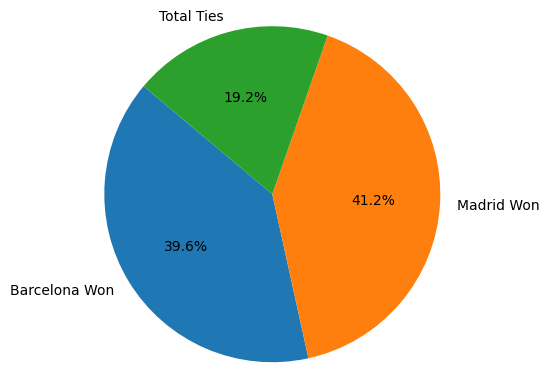

In [225]:

labels = ['Barcelona Won','Madrid Won', 'Total Ties']
values = [BarcelonaWon,MadridWon,TotalTies]  # Absolute values
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()


In [233]:

filtered_df = df[(df['home_team'] == "Real Madrid") & (df['away_team'] == "Barcelona")]
df['local_score'] = df['local_score'].astype(int)
total_goals = df.groupby('home_team')['local_score'].sum().reset_index()





AttributeError: 'list' object has no attribute 'sum'

# Q6.

# Q7.

First, we have to group the teams by division and season.

In [110]:
df = df[df['season'] != '2021-2022']
season_standings = df.groupby(['season', 'division'])['home_team'].unique().reset_index()
season_standings = season_standings.explode('home_team').reset_index(drop=True)
season_standings.columns = ['Season', 'Division', 'Team']

In [ ]:
#gf

In [ ]:
#ga

In [ ]:
#gd

In [ ]:
win_condition = lambda row: len(df[(df['season'] == row['Season']) & (df['home_team'] == row['Team']) & (df['results'] == 1)]) + len(df[(df['season'] == row['Season']) & (df['away_team'] == row['Team']) & (df['results'] == 2)])
season_standings['W'] = season_standings.apply(win_condition, axis = 1)

In [ ]:
lose_condition = lambda row: len(df[(df['season'] == row['Season']) & (df['home_team'] == row['Team']) & (df['results'] == 2)]) + len(df[(df['season'] == row['Season']) & (df['away_team'] == row['Team']) & (df['results'] == 1)])
season_standings['L'] = season_standings.apply(lose_condition, axis = 1)

In [ ]:
tie_condition = lambda row: len(df[(df['season'] == row['Season']) & ((df['home_team'] == row['Team']) | (df['away_team'] == row['Team'])) & (df['results'] == 'X')])
season_standings['T'] = season_standings.apply(tie_condition, axis = 1)

In [ ]:
#pts

# Q8.

# Q9.

# Q10.